# Visual
### Visual example of the optimisation algorithm wrt. price and when the HGV's arrive

In [1]:
# Import general python libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Import model specific libraries
import Prices
import Station

In [87]:
# Setup the station
electrolyser_capacity = 22.125*1
station_capacity = 9999
storage_capacity = 9.5*4

station1 = Station.Station(electrolyser_capacity, station_capacity, storage_capacity)

In [98]:
hi = [n for n in range(4,48,2)]
len(hi)

22

In [99]:
[4,10,13,23,28,35,42,47]

# Run the Station for a certain day and with certain HGV charging times
day = 181
elec_price = Prices.elec_prices(day)
dispenser_time_demand = np.array([n for n in range(4,48,2)])
starting_storage_level = 0

dispenser_demand = np.zeros(48)
for z in range(len(dispenser_time_demand)):
    dispenser_demand[dispenser_time_demand[z]] += 1
dispenser_demand = dispenser_demand * 32.09

demand, level = station1.get_optimised_electrolyser_demand(elec_price, dispenser_time_demand, starting_storage_level)

Text(24, 40, 'Electrolyser Capacity = 22.12. Storage Capacity = 38.0')

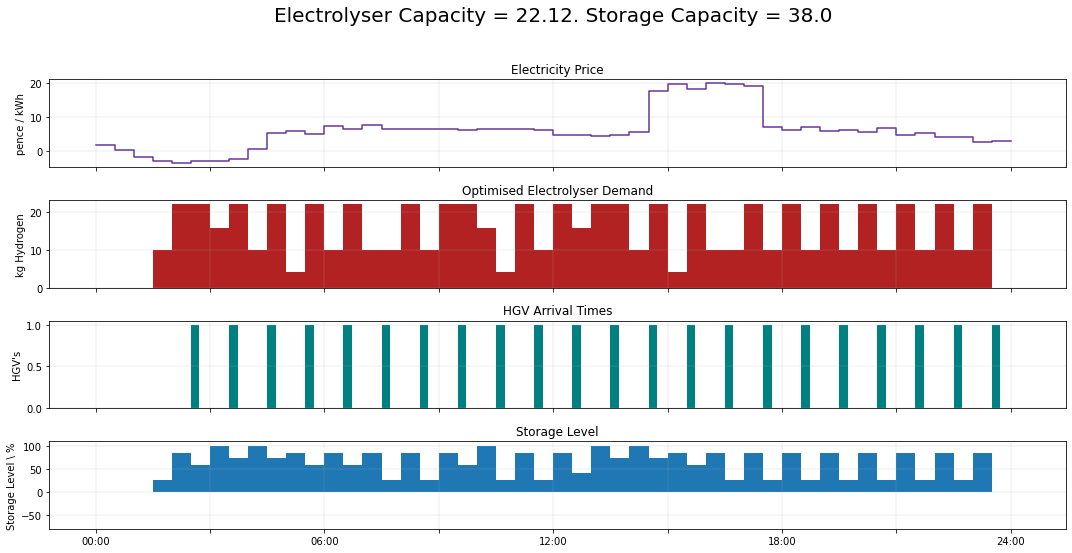

In [100]:
# Plotting the data nicely
x = np.array([n for n in range(48)])

fig, ax = plt.subplots(4,1, figsize=[15,7],sharex=True)

for n in range(len(ax)):
    my_xticks = [0,6,12,18,24,30,36,42,48]
    my_xticks_names = ['00:00','','06:00','','12:00','','18:00','','24:00']
    ax[n].set_xticks(my_xticks)
    ax[n].set_xticklabels(my_xticks_names)

new_elec_price = np.insert(elec_price,0,elec_price[0])
x_n = np.array([n for n in range(49)])
    
ax[0].title.set_text('Electricity Price')
ax[0].step(x_n, new_elec_price, color='rebeccapurple')
# ax[0].set_ylim(0)
ax[0].set_ylabel('pence / kWh')
ax[0].grid(lw=0.2)


ax[2].title.set_text('HGV Arrival Times')
ax[2].bar(x+1, dispenser_demand/32.09, color='teal',width=0.45, align='edge')
ax[2].set_ylabel('HGV\'s')
ax[2].grid(lw=0.2)

ax[1].title.set_text('Optimised Electrolyser Demand')
ax[1].bar(x, demand, color='firebrick',width=1,align='edge')
ax[1].set_ylabel('kg Hydrogen')
ax[1].grid(lw=0.2)

ax[3].title.set_text('Storage Level')
ax[3].bar(x, (level/storage_capacity)*100,width=1,align='edge')
ax[3].set_ylim(-80,110)
ax[3].set_ylabel('Storage Level \ %')
ax[3].grid(lw=0.2)

fig.tight_layout()
ax[0].text(24,40,('Electrolyser Capacity = '+str(round(electrolyser_capacity,2))+'. Storage Capacity = '+str(round(storage_capacity,2))),fontsize=20,
     horizontalalignment='center',
     verticalalignment='center')


Text(24, 40, 'Electrolyser Capacity = 22.12. Storage Capacity = 38.0')

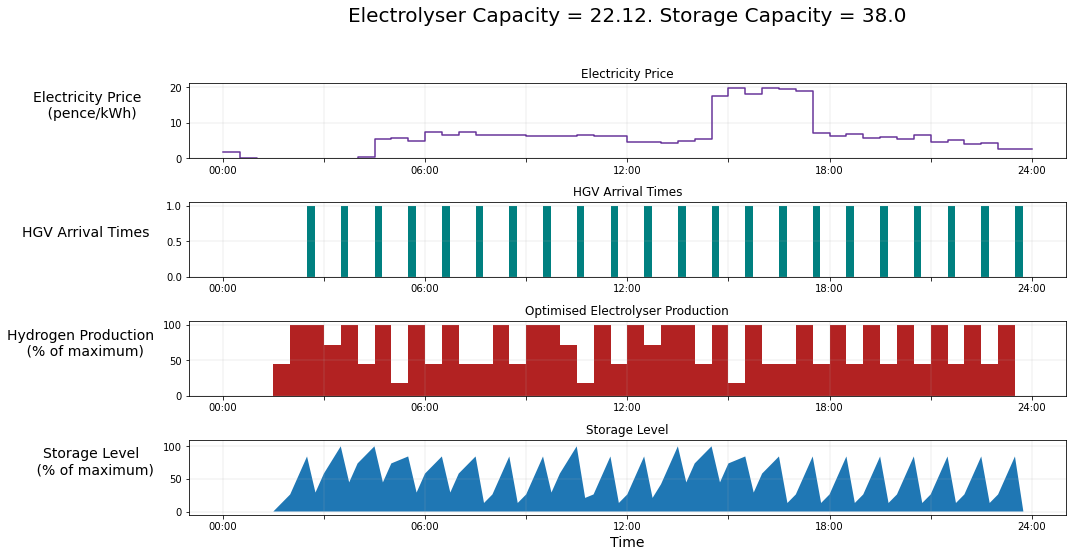

In [103]:
demand2 = np.zeros(2*len(demand)+2)
dispenser_demand2 = np.zeros(2*len(dispenser_demand)+2)

for n in range(len(demand)):
    demand2[2*n] = demand[n]/2
    demand2[2*n+1] = demand[n]/2
    dispenser_demand2[2*n+2] = dispenser_demand[n]
    
combined = np.zeros(len(demand2)+2)

for n in range(len(demand2)):
    combined[n] = demand2[n] - dispenser_demand2[n]
    
length = len(combined)
iterations = 100
total_length = length*iterations

integration = np.zeros(total_length)

for i in range(length):
    for j in range(iterations):
        if i == 0 and j == 0:
            integration[i*iterations+j] = combined[i]/iterations
        else:
            integration[i*iterations+j] = integration[i*iterations+j-1] + combined[i]/iterations
    
x = np.array([n for n in range(48)])

fig, ax = plt.subplots(4,1, figsize=[15,7])

for n in range(len(ax)):
    my_xticks = [0,6,12,18,24,30,36,42,48]
    my_xticks_names = ['00:00','','06:00','','12:00','','18:00','','24:00']
    ax[n].set_xticks(my_xticks)
    ax[n].set_xticklabels(my_xticks_names)

new_elec_price = np.insert(elec_price,0,elec_price[0])
x_n = np.array([n for n in range(49)])
    
ax[0].title.set_text('Electricity Price')
ax[0].step(x_n, new_elec_price, color='rebeccapurple')
ax[0].set_ylim(0)
ax[0].set_xlim(-2,50)
ax[0].set_ylabel('Electricity Price \n (pence/kWh)',fontsize=14,rotation=0, labelpad=80)
ax[0].grid(lw=0.2)


ax[1].title.set_text('HGV Arrival Times')
ax[1].bar(x+1, dispenser_demand/32.09, color='teal',width=0.45, align='edge')
ax[1].set_ylabel('HGV Arrival Times',fontsize=14,rotation=0, labelpad=80)
ax[1].grid(lw=0.2)
ax[1].set_xlim(-2,50)

ax[2].title.set_text('Optimised Electrolyser Production')
ax[2].bar(x, demand/electrolyser_capacity*100, color='firebrick',width=1,align='edge')
ax[2].set_ylabel('Hydrogen Production \n (% of maximum)',fontsize=14,rotation=0, labelpad=80)
ax[2].grid(lw=0.2)
ax[2].set_xlim(-2,50)

q = [n for n in range(len(integration))]

ax[3].title.set_text('Storage Level')
ax[3].fill(q, integration/storage_capacity*100)
ax[3].set_ylim(-5,110)
ax[3].set_xlim(-200*2,5000*2)
ax[3].set_ylabel('Storage Level \n (% of maximum)',fontsize=14,rotation=0, labelpad=70)
ax[3].grid(lw=0.2)
my_xticks = [0,600*2,1200*2,1800*2,2400*2,3000*2,3600*2,4200*2,4800*2]
my_xticks_names = ['00:00','','06:00','','12:00','','18:00','','24:00']
ax[3].set_xticks(my_xticks)
ax[3].set_xticklabels(my_xticks_names)
ax[3].set_xlabel('Time',fontsize=14)


fig.tight_layout()
ax[0].text(24,40,('Electrolyser Capacity = '+str(round(electrolyser_capacity,2))+'. Storage Capacity = '+str(round(storage_capacity,2))),fontsize=20,
     horizontalalignment='center',
     verticalalignment='center')




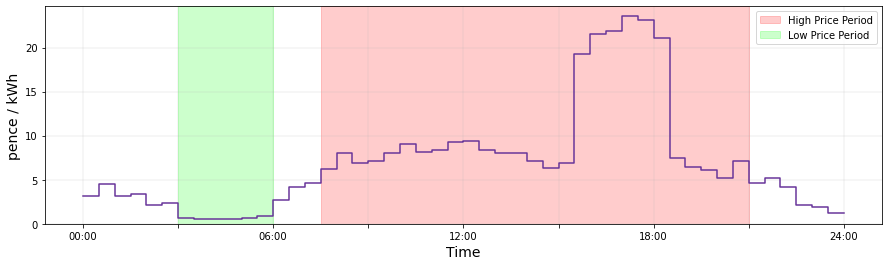

In [102]:
day = 40
price = Prices.elec_prices_data(day)
x = [n for n in range(len(price))]

new_elec_price = np.insert(price,0,price[0])
x_n = np.array([n for n in range(49)])

fig, ax = plt.subplots(figsize=[15,4])

ax.step(x_n,new_elec_price,color='rebeccapurple')

my_xticks = [0,6,12,18,24,30,36,42,48]
my_xticks_names = ['00:00','','06:00','','12:00','','18:00','','24:00']
ax.set_xticks(my_xticks)
ax.set_xticklabels(my_xticks_names)
ax.set_ylim(0)
ax.grid(lw=0.2)
ax.set_ylabel('pence / kWh',fontsize=14)
ax.set_xlabel('Time',fontsize=14)

ax.axvspan(15, 42, alpha=0.2, color='red',label='High Price Period')
ax.axvspan(6, 12, alpha=0.2, color='lime',label='Low Price Period')

ax.legend()


In [105]:
import StationV6 as stn

station2 = stn.Station()

dispenser_time_demand = [4,4,4]

station2.get_min_parameters(dispenser_time_demand)

print(station2.min_electrolyser_capacity)
print(station2.min_storage_capacity)

22.125
104.5


In [106]:
104.5/9.5

11.0